In [1]:
from neuralprophet import NeuralProphet
import pandas as pd

In [2]:
def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    df_daily['H'].fillna(method='ffill', inplace = True)
    df_daily['H'].fillna(method='ffill', inplace = True)
    df_daily = df_daily.interpolate(method='polynomial', order = 2)
    df = df_daily.reset_index()
    df['ID'] = ID
    df = df[['ds','y','H','ID']]
    
    return df

In [3]:
# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')
df1_test = make_df('H-S_seq_1.csv',ID = 'data1', slicing = 5)
df2_test = make_df('H-S_seq_2.csv',ID = 'data2', slicing = 5)

df = pd.concat((df3,df4,df5,df6,df7,df8))

sliced into 5 out of 62 data.
sliced into 5 out of 62 data.


In [4]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 30)
df1

,ds,y,H,ID
0,2021-08-06,0.000000,0.000,data1
1,2021-08-07,0.638215,0.000,data1
2,2021-08-08,1.249699,0.000,data1
3,2021-08-09,1.834452,0.000,data1
4,2021-08-10,2.392473,0.000,data1
...,...,...,...,...
293,2022-05-26,54.932000,4.464,data1
294,2022-05-27,54.932000,4.464,data1
295,2022-05-28,54.932000,4.464,data1
296,2022-05-29,54.932000,4.464,data1


In [5]:
m = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                  n_forecasts=10)

m = m.add_future_regressor(name='H', normalize=True)
# metrics = m.fit(df,freq='D')
metrics = m.fit(df)

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe 

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000000,data3,-0.445122,-0.445122,-0.445122,0.000000,0.000000
1,2021-08-07,0.568881,data3,-0.595605,-0.026723,-0.026723,0.000000,0.000000
2,2021-08-08,1.115569,data3,-0.723895,0.391675,0.391675,0.000000,0.000000
3,2021-08-09,1.640064,data3,-0.829991,0.810073,0.810073,0.000000,0.000000
4,2021-08-10,2.142365,data3,-0.913894,1.228472,1.228472,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,55.800000,data3,0.044296,55.844296,54.526417,1.317875,1.317875
294,2022-05-27,55.800000,data3,0.059127,55.859127,54.541256,1.317875,1.317875
295,2022-05-28,55.800000,data3,0.073970,55.873970,54.556095,1.317875,1.317875
296,2022-05-29,55.800000,data3,0.088809,55.888809,54.570934,1.317875,1.317875


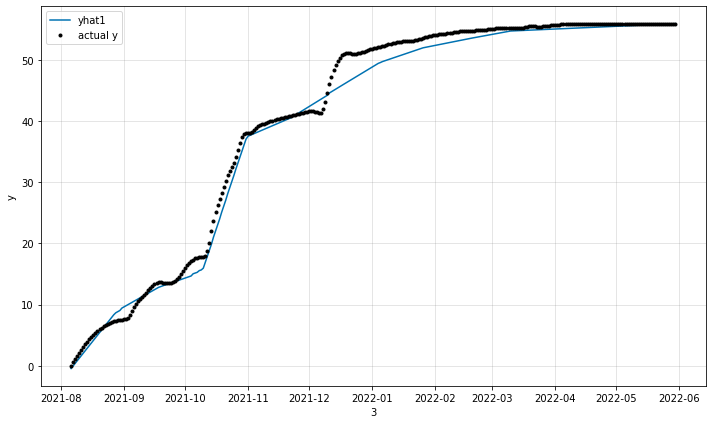

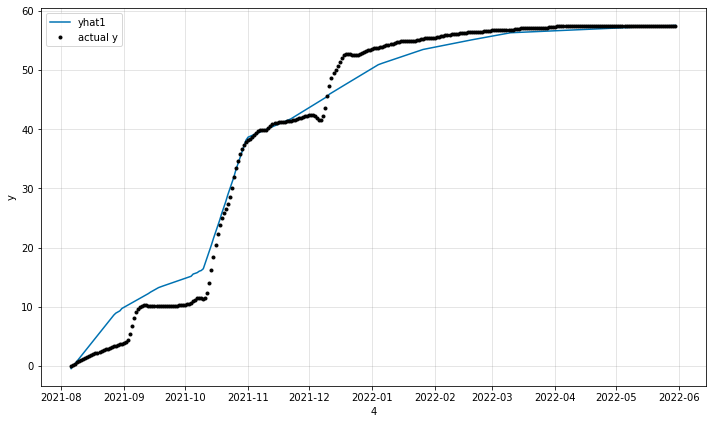

In [6]:
forecast3 = m.predict(df3)
forecast4 = m.predict(df4)
m.plot(forecast3, xlabel='3')
m.plot(forecast4, xlabel='4')

forecast3

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000000,data1,-1.300091,-1.300091,-1.300091,0.000000,0.000000
1,2021-08-07,0.638215,data1,-1.504058,-0.865843,-0.865843,0.000000,0.000000
2,2021-08-08,1.249699,data1,-1.681293,-0.431594,-0.431594,0.000000,0.000000
3,2021-08-09,1.834452,data1,-1.831798,0.002654,0.002654,0.000000,0.000000
4,2021-08-10,2.392473,data1,-1.955571,0.436902,0.436902,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,54.932000,data1,2.360694,57.292694,55.753918,1.538775,1.538775
294,2022-05-27,54.932000,data1,2.376086,57.308086,55.769314,1.538775,1.538775
295,2022-05-28,54.932000,data1,2.391490,57.323490,55.784718,1.538775,1.538775
296,2022-05-29,54.932000,data1,2.406894,57.338894,55.800117,1.538775,1.538775


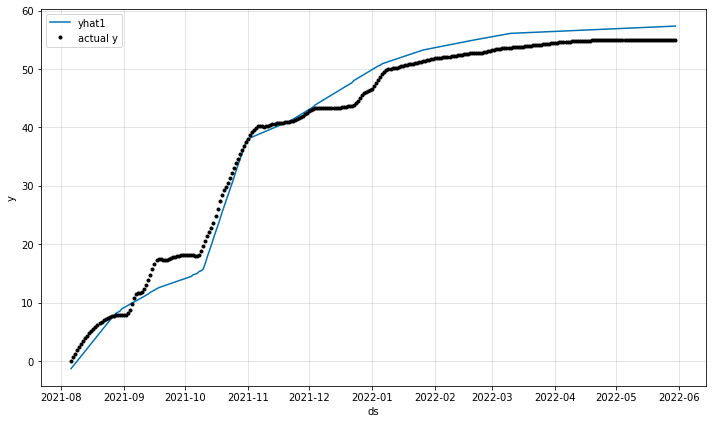

In [7]:
forecast1 = m.predict(df1)
m.plot(forecast1)

forecast1